In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set plot style
sns.set_theme(style="whitegrid")

# Create charts directory if not exists
os.makedirs("charts", exist_ok=True)



In [29]:
# Load fake time-off data
df = pd.read_csv("time_off_data.csv", parse_dates=["date"])

# Add derived columns
df["month"] = df["date"].dt.to_period("M").dt.to_timestamp()
df["year"] = df["date"].dt.year

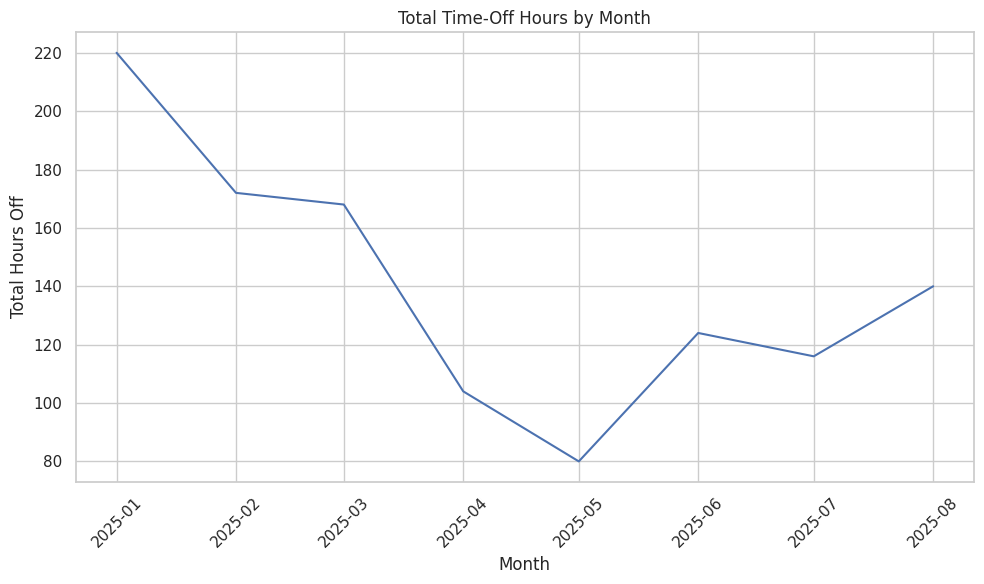

In [30]:

monthly_totals = df.groupby("month")["hours"].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_totals, x="month", y="hours", markers='o')
plt.title("Total Time-Off Hours by Month")
plt.xlabel("Month")
plt.ylabel("Total Hours Off")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("charts/time_off_by_month.png")
plt.show()

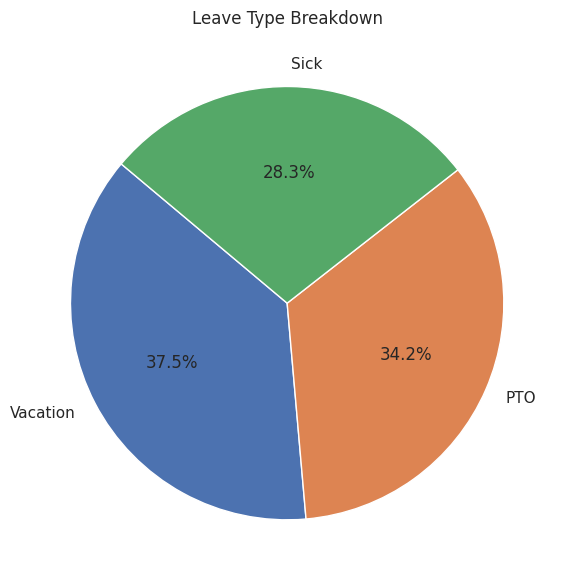

In [31]:
leave_type_counts = df["type"].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(leave_type_counts, labels=leave_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Leave Type Breakdown")
plt.tight_layout()
plt.savefig("charts/pto_type_breakdown.png")
plt.show()

/tmp/ipykernel_8508/2641585468.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dept_totals.values, y=dept_totals.index, palette="Blues_d")


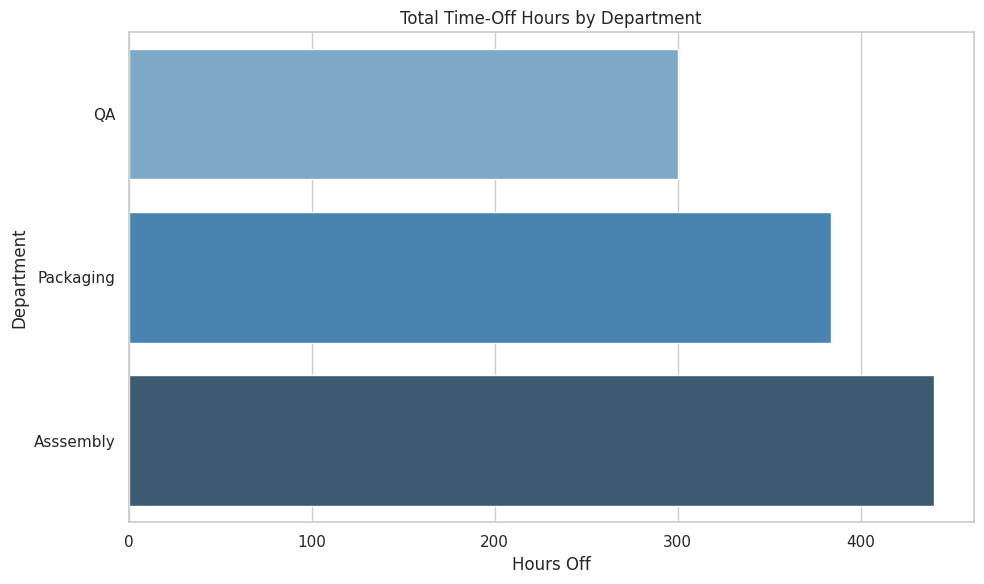

In [32]:
dept_totals = df.groupby("department")["hours"].sum().sort_values()
plt.figure(figsize=(10 ,6))
sns.barplot(x=dept_totals.values, y=dept_totals.index, palette="Blues_d")
plt.title("Total Time-Off Hours by Department")
plt.xlabel("Hours Off")
plt.ylabel("Department")
plt.tight_layout()
plt.savefig("charts/time_off_by_department.png")
plt.show()

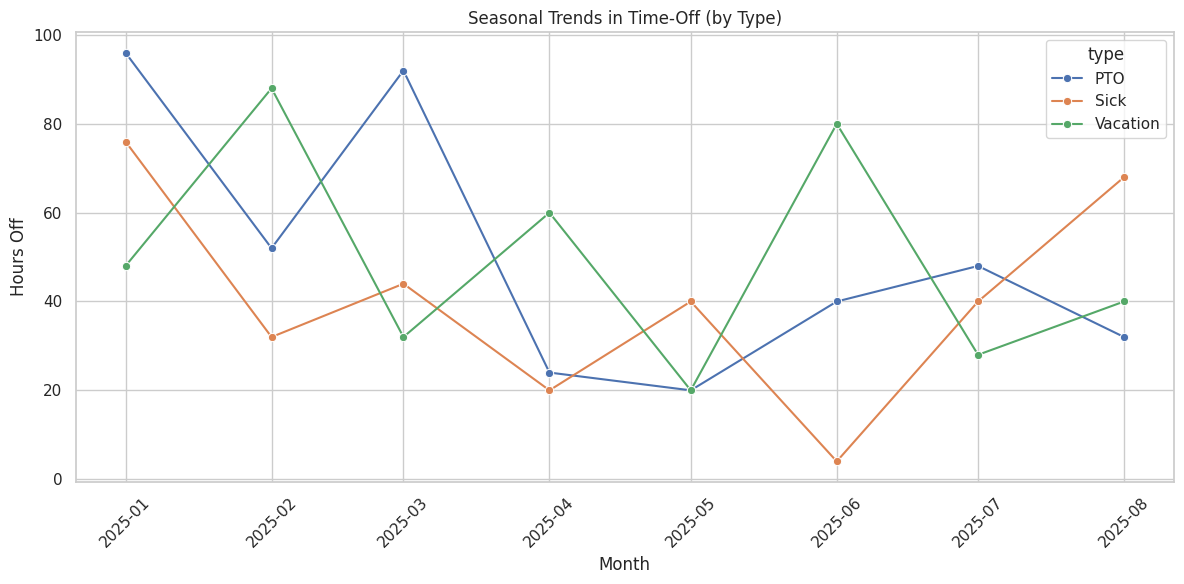

In [33]:
monthly_by_type = df.groupby(["month", "type"])["hours"].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_by_type, x="month", y="hours", hue="type", marker='o')
plt.title("Seasonal Trends in Time-Off (by Type)")
plt.xlabel("Month")
plt.ylabel("Hours Off")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("charts/seasonal_trends.png")
plt.show()

In [34]:
# Total time off per employee
employee_summary = df.groupby(["employee_id", "name"])["hours"].sum().reset_index()

# Define thresholds
too_much = employee_summary[employee_summary["hours"] > 200] # Arbitrary upper limit
none_taken = employee_summary[employee_summary["hours"] == 0]

print("Employees with Excessive Time Off (>200 hrs):")
print(too_much)

print("\nEmployees with No Time Off:")
print(none_taken)

Employees with Excessive Time Off (>200 hrs):
Empty DataFrame
Columns: [employee_id, name, hours]
Index: []

Employees with No Time Off:
Empty DataFrame
Columns: [employee_id, name, hours]
Index: []
